<a href="https://colab.research.google.com/github/Shai-vn/Social-Service-2023/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Analysis
What think the people about ChatGPT in some words?

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk

First, read the txt file with all the most frequent words of the tweets.

In [ ]:
def read_text(filename):
    with open(filename, 'r') as file:
        text = file.read()
    return text

words_file = '/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/word_list.txt'
text = read_text(words_file)



I want to know what the people think about ChatGPT in some words, so I generate a WordCloud with the words, the result:

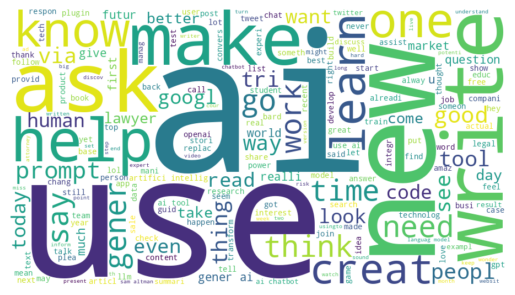

In [ ]:
wc = WordCloud(width=900, height=500, background_color="white")
wc.generate(text)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [ ]:
len(text)

366312

We have 366,

In [ ]:
def histograma_frecuencia_palabras_nltk(texto):
  """
  Construye un histograma con frecuencia de palabras usando la biblioteca nltk.

  Args:
    texto: El texto a partir del cual se construirá el histograma.

  Returns:
    Un objeto matplotlib.axes.Axes con el histograma.
  """

  # Importamos la biblioteca nltk.
  import nltk

  # Tokenizamos el texto.
  tokens = nltk.word_tokenize(texto)

  # Construimos el histograma.
  fig, ax = plt.subplots()
  ax.bar(nltk.FreqDist(tokens).keys(), nltk.FreqDist(tokens).values())

  # Agregamos etiquetas al eje x.
  ax.set_xlabel("Palabras")
  ax.set_ylabel("Frecuencia")

  return ax

#Data Analysis

Next, I analyzed the most frequent location of the tweets. Which conuntries talk more about Chatgpt on Twitter?

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/chatGPT_tweets.csv')
country_counts = data['user_location'].value_counts()

most_commom_countries = country_counts[:20]
most_commom_countries


Canada             894
Austin, TX         765
Australia          589
Houston, TX        375
Miami, FL          365
Earth              282
Dallas, TX         198
United States      188
Florida            166
Portugal           143
Tampa, FL          116
Fort Worth, TX     115
Israel             104
San Antonio, TX    103
Miami              103
Arizona, USA       101
Mexico              97
Austin, Texas       95
Orlando, FL         91
Phoenix, AZ         85
Name: user_location, dtype: int64

Now, we know that most of the tweets are from Canada!

<Axes: title={'center': 'Country frequencies'}, xlabel='Countries', ylabel='Tweets'>

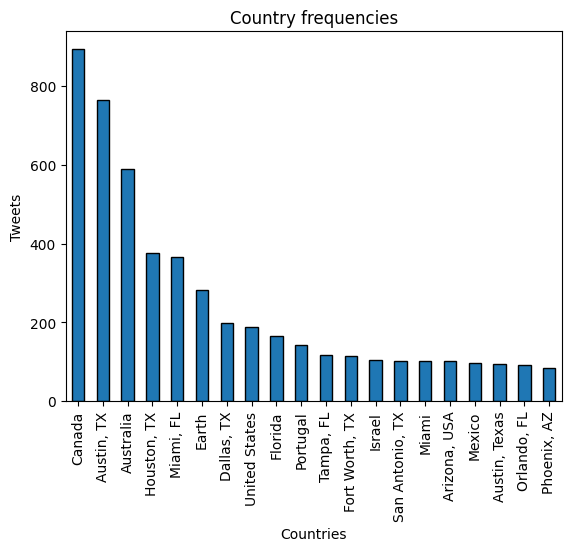

In [ ]:
#Country frequency graphic
most_commom_countries.plot(kind='bar', edgecolor='black',title='Country frequencies',
                           xlabel='Countries', ylabel='Tweets')


<Axes: title={'center': 'Source Tweets'}, xlabel='Source', ylabel='Tweets'>

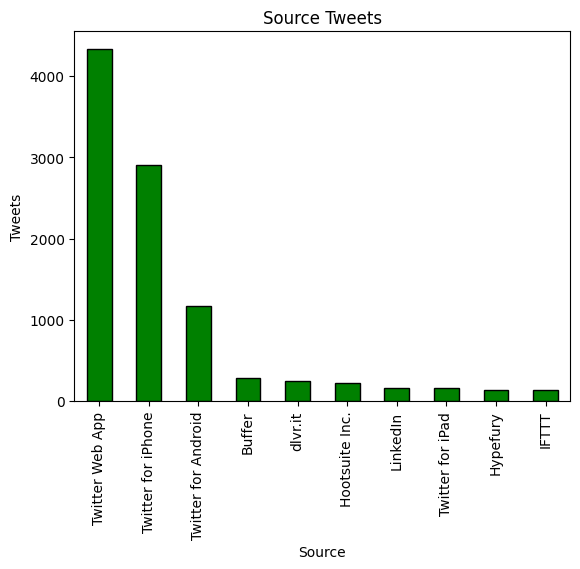

In [ ]:
devices = data['source'].value_counts()
commom_devices = devices[:10]
commom_devices.plot(kind='bar', title='Source Tweets',edgecolor= 'black' ,xlabel='Source',ylabel='Tweets', color='green')

In [ ]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sentiment_pipeline()